In [37]:
%matplotlib inline
import menpo.io as mio
from menpo.visualize import print_progress
from menpo.landmark import labeller, face_ibug_68_to_face_ibug_68_trimesh

path_to_images = './data'
training_images = []
for img in print_progress(mio.import_images(path_to_images, verbose=True)):
    # convert to greyscale
    if img.n_channels == 3:
        img = img.as_greyscale()
    # crop to landmarks bounding box with an extra 20% padding
    img = img.crop_to_landmarks_proportion(0.2)
    # rescale image if its diagonal is bigger than 400 pixels
    d = img.diagonal()
    if d > 1000:
        img = img.rescale(1000.0 / d)
    # define a TriMesh which will be useful for Piecewise Affine Warp of HolisticAAM
   # labeller(img, 'PTS', face_ibug_68_to_face_ibug_68_trimesh)
    # append to list
    training_images.append(img)

Found 11 assets, index the returned LazyList to import.
[====================] 100% (11/11) - done.                                     


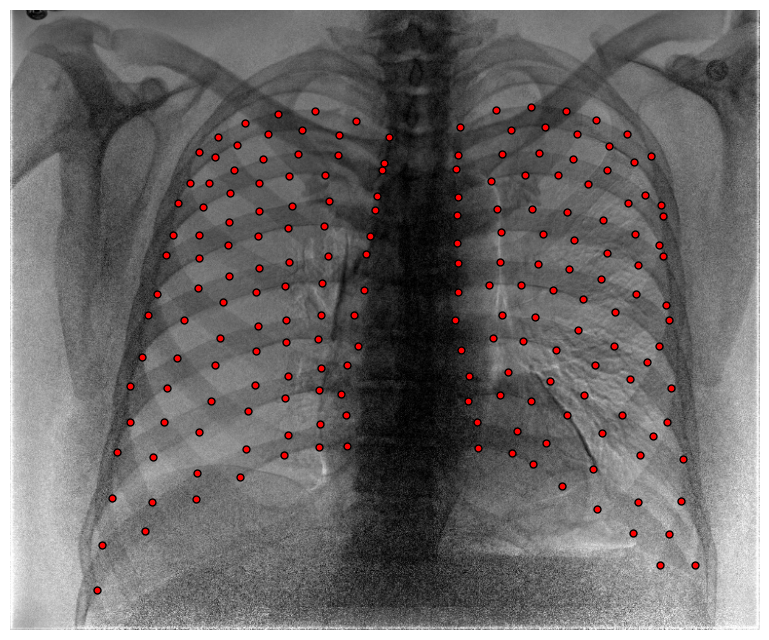

In [38]:
from menpowidgets import visualize_images
visualize_images(training_images)

In [39]:
from menpofit.aam import PatchAAM
from menpo.feature import fast_dsift

patch_aam = PatchAAM(training_images, group='PTS', patch_shape=[(15, 15), (23, 23)],
                     diagonal=500, scales=(0.5, 1.0), holistic_features=fast_dsift,
                     max_shape_components=20, max_appearance_components=150,
                     verbose=True)

- Computing reference shape                                                     Computing batch 0
- Building modelsges size: [==========] 100% (11/11) - done.                    
  - Scale 0: Doneding appearance model                                          ning
  - Scale 1: Doneding appearance model                                          
                                                              

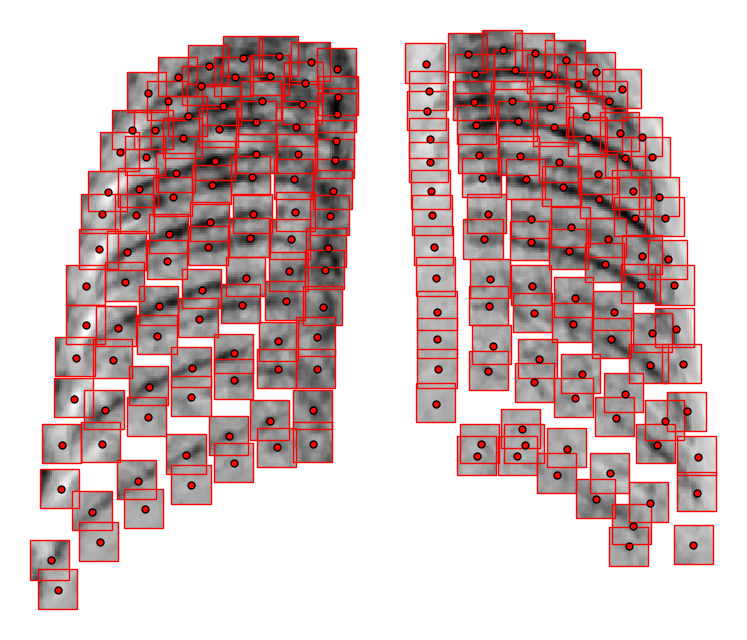

In [40]:
patch_aam.view_appearance_models_widget()

In [41]:
from menpofit.aam import LucasKanadeAAMFitter, WibergInverseCompositional

fitter = LucasKanadeAAMFitter(patch_aam, lk_algorithm_cls=WibergInverseCompositional,
                              n_shape=[5, 20], n_appearance=[30, 150])

In [42]:
from pathlib import Path
import menpo.io as mio

path_to_test = Path('./test/')

image = mio.import_image('./test/1.jpg')


In [43]:
from menpodetect import load_dlib_frontal_face_detector
from menpo.shape import PointDirectedGraph
#initialize box
import numpy as np
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 0, 0, 1],
                             [1, 0, 0, 0],])
points = np.array([[0,0], [0,2020], [2020, 2020], [2020, 0]])
graph = PointDirectedGraph(points, adjacency_matrix)
box=graph.bounding_box()

In [45]:
# initial bbox
initial_bbox = box

# fit image
result = fitter.fit_from_bb(image, initial_bbox, max_iters=[15, 5])

# print result
print(result)

Fitting result of 196 landmark points.


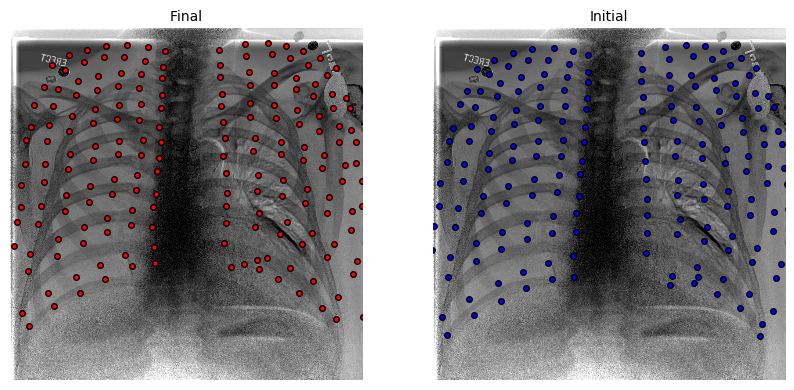

In [46]:
result.view(render_initial_shape=True)

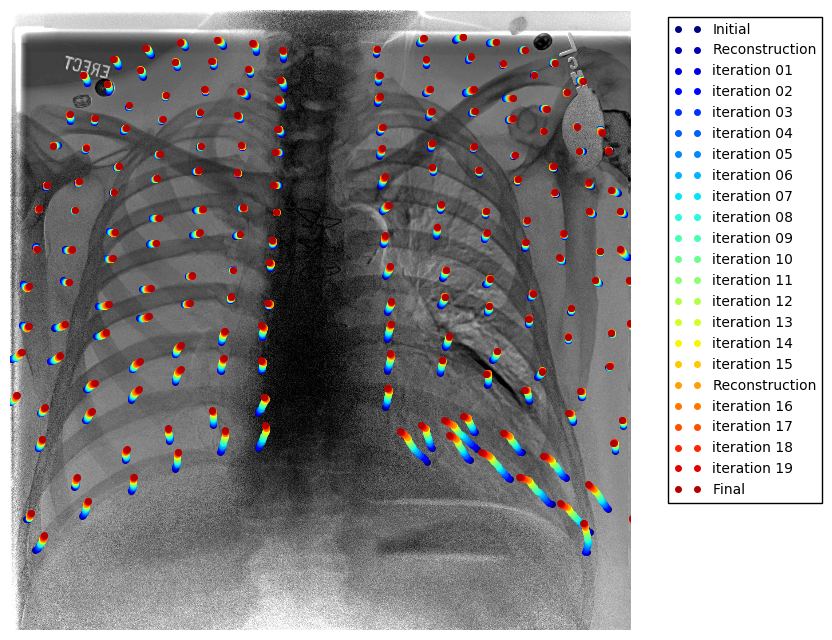

In [47]:
result.view_iterations()